In [2]:
#NOW THIS IS AN ESTONIAN STICK UP 
# g:Profiler Gang 
# older, but not as pretty, quickGO implementation is down there just keep scrolling 




In [1]:
#even simpler they have new python and R clients 
from gprofiler import GProfiler
gp = GProfiler(
    user_agent='Genedalph', #optional user agent
    return_dataframe=True, #return pandas dataframe or plain python structures    
)

In [2]:
gp.profile(organism='hsapiens',
            query=['NR1H4','TRIP12','UBC','FCRL3','PLXNA3','GDNF','VPS11'])


,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0048585,negative regulation of response to stimulus,0.003800,True,"""Any process that stops, prevents, or reduces ...",1601,7,6,17710,0.857143,0.003748,query_1,"[GO:0048519, GO:0048583, GO:0050896]"
1,GO:BP,GO:0002224,toll-like receptor signaling pathway,0.016116,True,"""Any series of molecular signals generated as ...",135,7,3,17710,0.428571,0.022222,query_1,[GO:0002221]
2,GO:BP,GO:0048486,parasympathetic nervous system development,0.024812,True,"""The process whose specific outcome is the pro...",19,7,2,17710,0.285714,0.105263,query_1,"[GO:0048731, GO:0048483]"
3,GO:BP,GO:0034162,toll-like receptor 9 signaling pathway,0.036682,True,"""Any series of molecular signals generated as ...",23,7,2,17710,0.285714,0.086957,query_1,[GO:0002224]
4,GO:BP,GO:0002221,pattern recognition receptor signaling pathway,0.040708,True,"""Any series of molecular signals generated as ...",184,7,3,17710,0.428571,0.016304,query_1,[GO:0002758]
5,CORUM,CORUM:5669,PlexinA3-Nrp1 complex,0.049602,True,PlexinA3-Nrp1 complex,2,2,1,3632,0.500000,0.500000,query_1,[CORUM:0000000]
6,CORUM,CORUM:5759,PLXNA3-RANBPM complex,0.049602,True,PLXNA3-RANBPM complex,2,2,1,3632,0.500000,0.500000,query_1,[CORUM:0000000]


In [3]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plot([go.Scatter(x=[1, 2, 3], y=[3, 1, 6])])

'temp-plot.html'

In [3]:
import requests

r = requests.post(
    url='https://biit.cs.ut.ee/gprofiler/api/gost/profile/',
    json={
    'organism':'hsapiens',
    'query':["CASQ2", "CASQ1", "GSTO1", "DMD", "GSTM2"],
    'sources' :sources, #custom databases
    'user_threshold':1e-8, #reduce the significance threshold,
    'significance_threshold_method':'bonferroni', #use bonferroni correction instrad of the default 'g_SCS'.
    'no_evidences':True, #skip lookup for evidence codes. Speeds up queries, if there is no interest in evidence codes.
    'no_iea':True, #Ignore electonically annotated GO annotations

    'domain_scope':'custom',#use the genes in the probe as the statistical background.
    'background':'AFFY_HG_U133A'
    },
    headers={
    'User-Agent':'Genedalph'
    }
)
r.json()['result']

[{'goshv': 17431,
  'p_value': 6.415127597228857e-17,
  'significant': True,
  'effective_domain_size': 14905,
  'intersection_size': 5,
  'term_size': 5,
  'query_size': 5,
  'precision': 1.0,
  'recall': 1.0,
  'description': '"Any process that modulates the frequency, rate or extent of skeletal muscle contraction via the regulation of the release of sequestered calcium ion by sarcoplasmic reticulum into cytosol. The sarcoplasmic reticulum is the endoplasmic reticulum of striated muscle, specialised for the sequestration of calcium ions that are released upon receipt of a signal relayed by the T tubules from the neuromuscular junction." [GOC:mtg_muscle]',
  'name': 'regulation of skeletal muscle contraction by regulation of release of sequestered calcium ion',
  'native': 'GO:0014809',
  'parents': ['GO:0010880', 'GO:0014722'],
  'source': 'GO:BP',
  'query': 'query_1',
  'source_order': 5299},
 {'goshv': 17401,
  'p_value': 3.8490765583373053e-16,
  'significant': True,
  'effective

In [2]:
# using only GO in sources will get the the 
# pass a python variablea into queries 

# If appropriate we can use the protein atlas ones later.
sources = ["GO:MF","GO:CC","GO:BP","KEGG","REAC","WP"]



In [7]:
query_test = ["CASQ2", "CASQ1", "GSTO1", "DMD", "GSTM2"]

r = requests.post(
    url='https://biit.cs.ut.ee/gprofiler/api/gost/profile/',
    json={
        'organism':'hsapiens',
        'query': query_test,
    }
    )
r.json()['result']


[{'goshv': 17431,
  'p_value': 6.045452804836617e-17,
  'significant': True,
  'effective_domain_size': 17710,
  'intersection_size': 5,
  'term_size': 5,
  'query_size': 5,
  'precision': 1.0,
  'recall': 1.0,
  'description': '"Any process that modulates the frequency, rate or extent of skeletal muscle contraction via the regulation of the release of sequestered calcium ion by sarcoplasmic reticulum into cytosol. The sarcoplasmic reticulum is the endoplasmic reticulum of striated muscle, specialised for the sequestration of calcium ions that are released upon receipt of a signal relayed by the T tubules from the neuromuscular junction." [GOC:mtg_muscle]',
  'name': 'regulation of skeletal muscle contraction by regulation of release of sequestered calcium ion',
  'native': 'GO:0014809',
  'parents': ['GO:0010880', 'GO:0014722'],
  'source': 'GO:BP',
  'intersections': [['IBA'],
   ['ISS', 'IBA', 'IEA'],
   ['IC'],
   ['ISS', 'IEA'],
   ['IC']],
  'query': 'query_1',
  'source_order': 

In [5]:
import json 

In [1]:
from bioservices import QuickGO

s = QuickGO()
res = s.Terms("GO:0003824")
# print(res)

test = s.goterms(max_number_of_pages=2)
test2 = s.gosearch("GO:0003824")
test_df = s.Annotation_from_goid("GO:0003824", max_number_of_pages=25)




fetching page 2 / 2 
fetching page 3 / 2 
As of 23d Oct 2017, the QuickGO API limits the number of pages to 25
fetching page 2 / 25 
fetching page 3 / 25 
fetching page 4 / 25 
fetching page 5 / 25 
fetching page 6 / 25 
fetching page 7 / 25 
fetching page 8 / 25 
fetching page 9 / 25 
fetching page 10 / 25 
fetching page 11 / 25 
fetching page 12 / 25 
fetching page 13 / 25 
fetching page 14 / 25 
fetching page 15 / 25 
fetching page 16 / 25 
fetching page 17 / 25 
fetching page 18 / 25 
fetching page 19 / 25 
fetching page 20 / 25 
fetching page 21 / 25 
fetching page 22 / 25 
fetching page 23 / 25 
fetching page 24 / 25 
fetching page 25 / 25 
fetching page 26 / 25 


In [5]:
import pandas as pd 


In [2]:

print(test)
# print(s.Annotation(protein="Q8IYB3", frmt="tsv", tax=9606,source="UniProt", col="proteinName,goID,goName"))



[{'id': 'GO:0005175', 'isObsolete': False, 'name': 'CD27 receptor binding', 'definition': {'text': 'Interacting selectively and non-covalently with a CD27, a receptor found on the surface of T cells and some B cells and NK cells.', 'xrefs': [{'dbCode': 'ISBN', 'dbId': '0120781859'}]}, 'history': [{'timestamp': '2009-07-03', 'action': 'Added', 'category': 'DEFINITION', 'text': 'Interacting selectively and non-covalently with a CD27, a receptor found on the surface of T cells and some B cells and NK cells.'}, {'timestamp': '2009-07-03', 'action': 'Deleted', 'category': 'DEFINITION', 'text': 'Interacting selectively with a CD27, a receptor found on the surface of T cells and some B cells and NK cells.'}, {'timestamp': '2008-05-13', 'action': 'Added', 'category': 'DEFINITION', 'text': 'Interacting selectively with a CD27, a receptor found on the surface of T cells and some B cells and NK cells.'}, {'timestamp': '2008-05-12', 'action': 'Deleted', 'category': 'DEFINITION', 'text': 'Interacti

In [3]:

print(test2)


{'numberOfHits': 4, 'results': [{'id': 'GO:0003824', 'isObsolete': False, 'name': 'catalytic activity', 'definition': {'text': 'Catalysis of a biochemical reaction at physiological temperatures. In biologically catalyzed reactions, the reactants are known as substrates, and the catalysts are naturally occurring macromolecular substances known as enzymes. Enzymes possess specific binding sites for substrates, and are usually composed wholly or largely of protein, but RNA that has catalytic activity (ribozyme) is often also regarded as enzymatic.'}, 'aspect': 'molecular_function'}, {'id': 'GO:0000811', 'isObsolete': False, 'name': 'GINS complex', 'definition': {'text': 'A heterotetrameric protein complex that associates with replication origins, where it is required for the initiation of DNA replication, and with replication forks.'}, 'aspect': 'cellular_component'}, {'id': 'GO:0070966', 'isObsolete': False, 'name': 'nuclear-transcribed mRNA catabolic process, no-go decay', 'definition':

In [4]:
test_df


,assignedBy,date,evidenceCode,extensions,geneProductId,goAspect,goEvidence,goId,goName,id,name,qualifier,reference,symbol,synonyms,targetSets,taxonId,taxonName,withFrom
0,UniProt,20190511,ECO:0000501,None,UniProtKB:A0A009EDZ8,molecular_function,IEA,GO:0004056,None,UniProtKB:A0A009EDZ8!345710873,None,enables,GO_REF:0000003,argH,None,None,1310605,None,"[{'connectedXrefs': [{'db': 'EC', 'id': '4.3.2..."
1,UniProt,20190511,ECO:0000323,None,UniProtKB:A0A009EDZ8,molecular_function,IEA,GO:0016829,None,UniProtKB:A0A009EDZ8!345749231,None,enables,GO_REF:0000038,argH,None,None,1310605,None,"[{'connectedXrefs': [{'db': 'UniProtKB-KW', 'i..."
2,UniProt,20190511,ECO:0000256,None,UniProtKB:A0A009EDZ8,molecular_function,IEA,GO:0004056,None,UniProtKB:A0A009EDZ8!345788076,None,enables,GO_REF:0000104,argH,None,None,1310605,None,"[{'connectedXrefs': [{'db': 'UniRule', 'id': '..."
3,InterPro,20190511,ECO:0000256,None,UniProtKB:A0A009EE19,molecular_function,IEA,GO:0003824,None,UniProtKB:A0A009EE19!96195406,None,enables,GO_REF:0000002,J504_3145,None,None,1310605,None,"[{'connectedXrefs': [{'db': 'InterPro', 'id': ..."
4,InterPro,20190511,ECO:0000256,None,UniProtKB:A0A009EE37,molecular_function,IEA,GO:0016747,None,UniProtKB:A0A009EE37!607457282,None,enables,GO_REF:0000002,J504_3229,None,None,1310605,None,"[{'connectedXrefs': [{'db': 'InterPro', 'id': ..."
5,UniProt,20190511,ECO:0000323,None,UniProtKB:A0A009EE37,molecular_function,IEA,GO:0016746,None,UniProtKB:A0A009EE37!607537930,None,enables,GO_REF:0000038,J504_3229,None,None,1310605,None,"[{'connectedXrefs': [{'db': 'UniProtKB-KW', 'i..."
6,UniProt,20190511,ECO:0000323,None,UniProtKB:A0A009EE37,molecular_function,IEA,GO:0016740,None,UniProtKB:A0A009EE37!607558495,None,enables,GO_REF:0000038,J504_3229,None,None,1310605,None,"[{'connectedXrefs': [{'db': 'UniProtKB-KW', 'i..."
7,UniProt,20190511,ECO:0000323,None,UniProtKB:A0A009EEC9,molecular_function,IEA,GO:0004519,None,UniProtKB:A0A009EEC9!82255402,None,enables,GO_REF:0000038,J504_3212,None,None,1310605,None,"[{'connectedXrefs': [{'db': 'UniProtKB-KW', 'i..."
8,UniProt,20190511,ECO:0000323,None,UniProtKB:A0A009EEH9,molecular_function,IEA,GO:0008168,None,UniProtKB:A0A009EEH9!609161606,None,enables,GO_REF:0000038,J504_3208,None,None,1310605,None,"[{'connectedXrefs': [{'db': 'UniProtKB-KW', 'i..."
9,UniProt,20190511,ECO:0000323,None,UniProtKB:A0A009EEH9,molecular_function,IEA,GO:0016740,None,UniProtKB:A0A009EEH9!609175162,None,enables,GO_REF:0000038,J504_3208,None,None,1310605,None,"[{'connectedXrefs': [{'db': 'UniProtKB-KW', 'i..."


In [10]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [13]:
import gseapy.parser
# from gseapy.parser import Biomart

In [16]:
help(gseapy.parser)

Help on module gseapy.parser in gseapy:

NAME
    gseapy.parser - # -*- coding: utf-8 -*-

FUNCTIONS
    get_library_name()
        return enrichr active enrichr library name.
    
    gsea_cls_parser(cls)
        Extact class(phenotype) name from .cls file.
        
        :param cls: the a class list instance or .cls file which is identical to GSEA input .
        :return: phenotype name and a list of class vector.
    
    gsea_edb_parser(results_path, index=0)
        Parse results.edb file stored under **edb** file folder.
        
        :param results_path: the .results file where lcoated inside edb folder.
        :param index: gene_set index of gmt database, used for iterating items.
        :return: enrichment_term, hit_index,nes, pval, fdr.
    
    gsea_gmt_parser(gmt, min_size=3, max_size=1000, gene_list=None)
        Parse gene_sets.gmt(gene set database) file or download from enrichr server.
        
        :param gmt: the gene_sets.gmt file of GSEA input or an enrich

In [17]:
gene_list = ['CDKN1A', 'PSD2' , 'AHNAK2' , 'EXO1', 'BLM', 'KIAA1217']

In [18]:

names = gp.get_library_name()

In [19]:
names[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_down']

In [79]:
# enr = gp.enrichr(gene_list="./data/gene_list.txt",
# gene_list= needs to be a df or series
# for some reason will still only take a single gene set instead of a list
# feed it with textfiles only otherwise it will not work with lists

# hogwash doesn't allow any lists at all 
# gene_sets='KEGG_2016',
# or gene_sets='KEGG_2016,KEGG_2013',
Genedalf_libraries = ['KEGG_2016','GO_Biological_Process_2018', 
                      'GO_Cellular_Component_2018', 
                      'GO_Molecular_Function_2018', 'WikiPathways_2016']

enr = gp.enrichr(gene_list="./test/data/smol_data.txt",
                 description='test_name',
                 gene_sets= 'GO_Biological_Process_2018',
                 outdir='test/enrichr_test',
                 cutoff=0.5) 

/home/felipe/anaconda3/lib/python3.6/site-packages/gseapy/enrichr.py:149: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  df =  read_table(outfile)


In [63]:
enr


In [67]:
enr.res2d

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Z-score,Combined Score,Genes
0,telomere maintenance via telomere trimming (GO...,2/12,0.000337,0.040595,0.000538,0.063288,-3.225409,25.792417,BLM;EXO1
1,t-circle formation (GO:0090656),2/12,0.000337,0.040595,0.000538,0.063288,-2.915416,23.313523,BLM;EXO1
2,collagen metabolic process (GO:0032963),2/13,0.000397,0.040595,0.000619,0.063288,-2.901590,22.722490,TNXB;COL5A1
3,formation of extrachromosomal circular DNA (GO...,2/12,0.000337,0.040595,0.000538,0.063288,-2.712687,21.692373,BLM;EXO1
4,regulation of glial cell differentiation (GO:0...,1/7,0.015992,0.109817,0.019737,0.125067,-4.021256,16.630645,CDK1
5,strand displacement (GO:0000732),2/27,0.001751,0.091212,0.002343,0.121546,-2.590381,16.442361,BLM;EXO1
6,regulation of keratinocyte apoptotic process (...,1/7,0.015992,0.109817,0.019737,0.125067,-3.824049,15.815058,GSN
7,positive regulation of spindle checkpoint (GO:...,1/9,0.020515,0.109817,0.024612,0.125067,-3.537362,13.748368,MAD2L1
8,DNA replication (GO:0006260),4/121,0.000171,0.040595,0.000252,0.063288,-1.557145,13.507214,BLM;CDC45;EXO1;CDK1
9,eye morphogenesis (GO:0048592),2/21,0.001057,0.077157,0.001474,0.107569,-1.935603,13.263462,COL5A1;FBN1


/home/felipe/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/felipe/anaconda3/lib/python3.6/site-packages/gseapy/plot.py:285: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  idx = [area.argmax(), np.abs(area - area.mean()).argmin(), area.argmin()]
/home/felipe/anaconda3/lib/python3.6/site-packages/gseapy/plot.py:285: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the fu

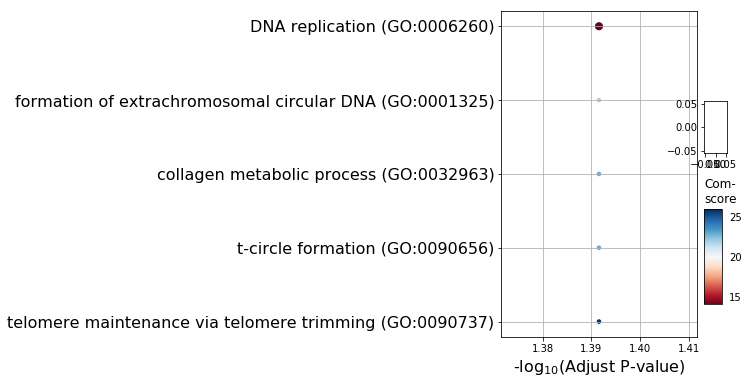

In [73]:
from gseapy.plot import barplot, dotplot
try:
    dotplot(enr.res2d)

except TypeError:
    pass

In [38]:
old_df = pd.read_csv("old_degwENSG.txt", sep="\t")

In [47]:
glist = old_df.deg.unique()
glist_smol = glist[:50]
glist_smol.to_csv("test_list.txt", index=None, header=None)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [49]:
df['col1'] = df['col1'].apply(lambda i: ''.join(i))

NameError: name 'df' is not defined

In [48]:
i = list(glist)

In [50]:
df = pd.DataFrame(i)

In [52]:
df.to_csv("test_list.txt", index=None, header=None)

In [32]:
import os 
p='test/enrichr_kegg'
p = os.fspath(p)

'test/enrichr_kegg'